In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Experimentos del TP de Subset Sum

En esta carpeta de Jupyer vamos a poner lo relativo a realizar la experimentación computacional.

    Asegurarse de correr los experimentos en el notebook Experimentos antes de utilizar este notebook.
    En este archivo se lee el output de los experimentos y se muestra de manera gráfica esos resultados.



Métodos

Los métodos evaluados en este notebook son los siguientes:

    FB: Fuerza Bruta.
    BT: Backtracking con podas por optimalidad y factibilidad.
    BT-F: Backtracking solamente con poda por factibilidad.
    BT-B: Backtracking solamente con poda por optimalidad.
    DP: Programación dinámica.



In [2]:
df_resultados = pd.read_csv("resultados/resultado.csv");
df_resultados.head()

,dataset,n,M,metodo,tiempo
0,densidad-alta,0,0,FB,0.002039
1,densidad-alta,1,1,FB,0.002113
2,densidad-alta,2,1,FB,0.002878
3,densidad-alta,3,2,FB,0.003420
4,densidad-alta,4,2,FB,0.004719


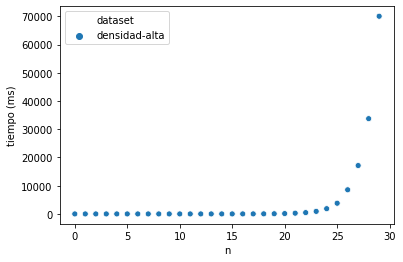

In [4]:
# Graficamos los tiempos de ejecución de cada dataset en función de n.
df_complejidad_FB = df_resultados[df_resultados["metodo"]=="FB"].copy();
fig = sns.scatterplot(data=df_complejidad_FB, x='n', y='tiempo', hue='dataset');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/fb-densidades.svg");

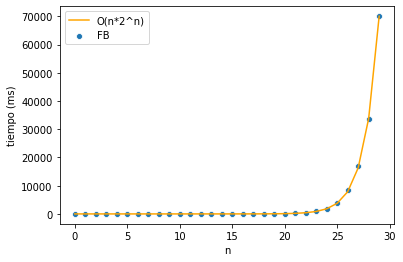

In [30]:
# Comparamos el dataset densidad-alta contra una función exponencial.
df_complejidad_FB = df_resultados[(df_resultados["metodo"]=="FB") & (df_resultados["dataset"]=="densidad-alta")].copy();
df_complejidad_FB["tiempo_esperado"] = df_complejidad_FB["n"] * 2.0 ** df_complejidad_FB["n"]* 0.0000045; # Exponencial
fig = sns.scatterplot(data=df_complejidad_FB, x='n', y='tiempo');
fig = sns.lineplot(data=df_complejidad_FB, x='n', y='tiempo_esperado', color="orange");
fig.legend(labels=['O(n*2^n)','FB']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/fb-complejidad.svg")

Índice de correlación de Pearson:                     n         M    tiempo  complejidad
n            1.000000  0.998352  0.513597     0.509049
M            0.998352  1.000000  0.517578     0.513037
tiempo       0.513597  0.517578  1.000000     0.999906
complejidad  0.509049  0.513037  0.999906     1.000000


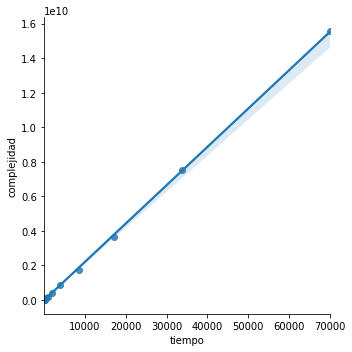

In [42]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_complejidad_FB = df_resultados[(df_resultados["metodo"]=="FB") & (df_resultados["dataset"]=="densidad-alta")].copy();
df_complejidad_FB["complejidad"] = df_complejidad_FB["n"] * 2.0 ** df_complejidad_FB["n"];
fig = sns.lmplot(data=df_complejidad_FB, x="tiempo", y="complejidad");
plt.savefig("graficos/fb-correlacion.jpeg");
print("Índice de correlación de Pearson:", df_complejidad_FB.corr());#correlacion_pearson(df_complejidad_FB, "tiempo", "complejidad"));